In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
#Display only top 5 and bottom 5 rows
pd.set_option('display.max_rows' , 10)

In [ ]:
def nl():
    print('\n')

In [ ]:
df_train=pd.read_csv('train_ML_IOT.csv' , parse_dates=[0] , infer_datetime_format=True)
df_test=pd.read_csv('test_ML_IOT.csv' , parse_dates=[0] , infer_datetime_format=True)

In [ ]:
df_train.head()

In [ ]:
df_train.info()

In [6]:
df_test.head() 

,DateTime,Junction,ID
0,2017-07-01 00:00:00,1,20170701001
1,2017-07-01 01:00:00,1,20170701011
2,2017-07-01 02:00:00,1,20170701021
3,2017-07-01 03:00:00,1,20170701031
4,2017-07-01 04:00:00,1,20170701041


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11808 entries, 0 to 11807
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  11808 non-null  datetime64[ns]
 1   Junction  11808 non-null  int64         
 2   ID        11808 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 276.9 KB


In [82]:
nl()
print('Size of training set :' + str(df_train.shape))
print('Size of testing set :' + str(df_test.shape))

nl()
print('Columns in train :' + str(df_train.columns.tolist()))
print('Columns in test :' + str(df_train.columns.tolist()))

df_train.head()



Size of training set :(48120, 4)
Size of testing set :(11808, 3)


Columns in train :['DateTime', 'Junction', 'Vehicles', 'ID']
Columns in test :['DateTime', 'Junction', 'Vehicles', 'ID']


,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [83]:
#Quick EDA

In [10]:
df_tmp=df_train.set_index(['Junction' , 'DateTime'])  #we changed the index 0,1,2 to the column junction and datetime ,
#we didn't put inplace=True because it is not change in dataset
df_tmp.head()

Vehicles           ID
Junction DateTime                                  
1        2015-11-01 00:00:00        15  20151101001
         2015-11-01 01:00:00        13  20151101011
         2015-11-01 02:00:00        10  20151101021
         2015-11-01 03:00:00         7  20151101031
         2015-11-01 04:00:00         9  20151101041

In [11]:
df_tmp.info()  #datetime and junction are index not columns

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 48120 entries, (1, Timestamp('2015-11-01 00:00:00')) to (4, Timestamp('2017-06-30 23:00:00'))
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Vehicles  48120 non-null  int64
 1   ID        48120 non-null  int64
dtypes: int64(2)
memory usage: 1.5 MB


In [12]:
level_values=df_tmp.index.get_level_values
level_values

<bound method MultiIndex.get_level_values of MultiIndex([(1, '2015-11-01 00:00:00'),
            (1, '2015-11-01 01:00:00'),
            (1, '2015-11-01 02:00:00'),
            (1, '2015-11-01 03:00:00'),
            (1, '2015-11-01 04:00:00'),
            (1, '2015-11-01 05:00:00'),
            (1, '2015-11-01 06:00:00'),
            (1, '2015-11-01 07:00:00'),
            (1, '2015-11-01 08:00:00'),
            (1, '2015-11-01 09:00:00'),
            ...
            (4, '2017-06-30 14:00:00'),
            (4, '2017-06-30 15:00:00'),
            (4, '2017-06-30 16:00:00'),
            (4, '2017-06-30 17:00:00'),
            (4, '2017-06-30 18:00:00'),
            (4, '2017-06-30 19:00:00'),
            (4, '2017-06-30 20:00:00'),
            (4, '2017-06-30 21:00:00'),
            (4, '2017-06-30 22:00:00'),
            (4, '2017-06-30 23:00:00')],
           names=['Junction', 'DateTime'], length=48120)>

In [86]:
time_targets=df_tmp.groupby([level_values(0)] + [pd.Grouper(freq='1M' , level=-1)])['Vehicles'].sum()
time_targets

Junction  DateTime  
1         2015-11-30    14736
          2015-12-31    15487
          2016-01-31    17940
          2016-02-29    20813
          2016-03-31    22215
                        ...  
4         2017-02-28     5564
          2017-03-31     4931
          2017-04-30     4454
          2017-05-31     4877
          2017-06-30     6097
Name: Vehicles, Length: 66, dtype: int64

In [87]:
del df_tmp
del time_targets

In [88]:
#lag_features

In [89]:
train=df_train.pivot(index='DateTime' , columns='Junction' , values='Vehicles')
train

Junction,1,2,3,4
DateTime,,,,
2015-11-01 00:00:00,15.0,6.0,9.0,NaN
2015-11-01 01:00:00,13.0,6.0,7.0,NaN
2015-11-01 02:00:00,10.0,5.0,5.0,NaN
2015-11-01 03:00:00,7.0,6.0,1.0,NaN
2015-11-01 04:00:00,9.0,7.0,2.0,NaN
...,...,...,...,...
2017-06-30 19:00:00,105.0,34.0,33.0,11.0
2017-06-30 20:00:00,96.0,35.0,31.0,30.0
2017-06-30 21:00:00,90.0,31.0,28.0,16.0


In [90]:
train=train.fillna(0) #fill NaNs with 0 vehicles

In [91]:
#Generating lag features
def gen_Lag_features(df , n_in=1 , n_out=1 , dropnan=True):
    
    n_vars=df.shape[1]
    cols, names=list() , list()
    
    for i in range (n_in , 0 , -1):
        cols.append(df.shift(i))
        names+=[('Junction %d (H-%d)' % (j+1 , i)) for j in range (n_vars)]
    for i in range ( 0 , n_out):
        cols.append(df.shift(-i))
        if i==0:
            names+=[('Junction %d (H)' % (j+1)) for j in range (n_vars)]
        else :
            names+=[('Junction %d (H+%d)' % (j+1 , i)) for j in range (n_vars)]
     
    agg=pd.concat(cols , axis=1)
    agg.columns=names
                    
    if dropnan:
        agg.dropna(inplace=True)
    return agg 
                
        

In [92]:
Xy_train=gen_Lag_features(train)
Xy_train

,Junction 1 (H-1),Junction 2 (H-1),Junction 3 (H-1),Junction 4 (H-1),Junction 1 (H),Junction 2 (H),Junction 3 (H),Junction 4 (H)
DateTime,,,,,,,,
2015-11-01 01:00:00,15.0,6.0,9.0,0.0,13.0,6.0,7.0,0.0
2015-11-01 02:00:00,13.0,6.0,7.0,0.0,10.0,5.0,5.0,0.0
2015-11-01 03:00:00,10.0,5.0,5.0,0.0,7.0,6.0,1.0,0.0
2015-11-01 04:00:00,7.0,6.0,1.0,0.0,9.0,7.0,2.0,0.0
2015-11-01 05:00:00,9.0,7.0,2.0,0.0,6.0,2.0,2.0,0.0
...,...,...,...,...,...,...,...,...
2017-06-30 19:00:00,95.0,34.0,38.0,17.0,105.0,34.0,33.0,11.0
2017-06-30 20:00:00,105.0,34.0,33.0,11.0,96.0,35.0,31.0,30.0
2017-06-30 21:00:00,96.0,35.0,31.0,30.0,90.0,31.0,28.0,16.0


In [93]:
from sklearn.preprocessing import MinMaxScaler , StandardScaler
scaler=MinMaxScaler(feature_range=(0 , 1))
Xy_train[Xy_train.columns] =scaler.fit_transform(Xy_train[Xy_train.columns])
Xy_train

,Junction 1 (H-1),Junction 2 (H-1),Junction 3 (H-1),Junction 4 (H-1),Junction 1 (H),Junction 2 (H),Junction 3 (H),Junction 4 (H)
DateTime,,,,,,,,
2015-11-01 01:00:00,0.066225,0.106383,0.044693,0.000000,0.052980,0.106383,0.033520,0.000000
2015-11-01 02:00:00,0.052980,0.106383,0.033520,0.000000,0.033113,0.085106,0.022346,0.000000
2015-11-01 03:00:00,0.033113,0.085106,0.022346,0.000000,0.013245,0.106383,0.000000,0.000000
2015-11-01 04:00:00,0.013245,0.106383,0.000000,0.000000,0.026490,0.127660,0.005587,0.000000
2015-11-01 05:00:00,0.026490,0.127660,0.005587,0.000000,0.006623,0.021277,0.005587,0.000000
...,...,...,...,...,...,...,...,...
2017-06-30 19:00:00,0.596026,0.702128,0.206704,0.472222,0.662252,0.702128,0.178771,0.305556
2017-06-30 20:00:00,0.662252,0.702128,0.178771,0.305556,0.602649,0.723404,0.167598,0.833333
2017-06-30 21:00:00,0.602649,0.723404,0.167598,0.833333,0.562914,0.638298,0.150838,0.444444


In [94]:
#Split train and valid (and normalize for real )

In [95]:
X_train=Xy_train[Xy_train.index <'2017-04-01'].iloc[: , 0:4]
X_train

,Junction 1 (H-1),Junction 2 (H-1),Junction 3 (H-1),Junction 4 (H-1)
DateTime,,,,
2015-11-01 01:00:00,0.066225,0.106383,0.044693,0.000000
2015-11-01 02:00:00,0.052980,0.106383,0.033520,0.000000
2015-11-01 03:00:00,0.033113,0.085106,0.022346,0.000000
2015-11-01 04:00:00,0.013245,0.106383,0.000000,0.000000
2015-11-01 05:00:00,0.026490,0.127660,0.005587,0.000000
...,...,...,...,...
2017-03-31 19:00:00,0.476821,0.574468,0.178771,0.166667
2017-03-31 20:00:00,0.496689,0.531915,0.156425,0.222222
2017-03-31 21:00:00,0.483444,0.638298,0.156425,0.222222


In [96]:
y_train=Xy_train[Xy_train.index<'2017-04-01'].iloc[:,4:]
y_train

,Junction 1 (H),Junction 2 (H),Junction 3 (H),Junction 4 (H)
DateTime,,,,
2015-11-01 01:00:00,0.052980,0.106383,0.033520,0.000000
2015-11-01 02:00:00,0.033113,0.085106,0.022346,0.000000
2015-11-01 03:00:00,0.013245,0.106383,0.000000,0.000000
2015-11-01 04:00:00,0.026490,0.127660,0.005587,0.000000
2015-11-01 05:00:00,0.006623,0.021277,0.005587,0.000000
...,...,...,...,...
2017-03-31 19:00:00,0.496689,0.531915,0.156425,0.222222
2017-03-31 20:00:00,0.483444,0.638298,0.156425,0.222222
2017-03-31 21:00:00,0.403974,0.574468,0.150838,0.250000


In [97]:
print(X_train.shape , y_train.shape)

(12407, 4) (12407, 4)


In [98]:
X_train=np.expand_dims(X_train.values , axis=2)
print(X_train.shape)
y_train=y_train.values
print(y_train.shape)

(12407, 4, 1)
(12407, 4)


In [99]:
#Modeling

In [100]:
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import LSTM
from keras.initializers import he_normal
import keras.backend as K

def root_mean_squared_error(y_true , y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true) , axis=-1))

In [101]:
#Initializing RNN
regressor=Sequential()
#Adding the input layer and the Lstm layer
regressor.add(LSTM(units=50,
                  activation='relu' , #default is tanh
                  kernel_initializer=he_normal(seed=0),
                  input_shape=(None , 1 )))

#Output for 4 junctions
regressor.add(Dense(units=4))
#Compiling the RNN
regressor.compile(optimizer='adam' , loss=root_mean_squared_error)

In [102]:
#Filtering the RNN to the training set
regressor.fit(X_train , y_train , batch_size=128 , epochs=10 , verbose=1)

Epoch 1/10
97/97 [==============================] - 3s 7ms/step - loss: 0.1090
Epoch 2/10
97/97 [==============================] - 1s 7ms/step - loss: 0.0404
Epoch 3/10
97/97 [==============================] - 1s 6ms/step - loss: 0.0364
Epoch 4/10
97/97 [==============================] - 1s 6ms/step - loss: 0.0345
Epoch 5/10
97/97 [==============================] - 1s 7ms/step - loss: 0.0336
Epoch 6/10
97/97 [==============================] - 1s 6ms/step - loss: 0.0330
Epoch 7/10
97/97 [==============================] - 1s 6ms/step - loss: 0.0327
Epoch 8/10
97/97 [==============================] - 1s 7ms/step - loss: 0.0325
Epoch 9/10
97/97 [==============================] - 1s 6ms/step - loss: 0.0324
Epoch 10/10
97/97 [==============================] - 1s 6ms/step - loss: 0.0322


In [103]:
#Validating

In [104]:
X_valid=Xy_train[Xy_train.index>='2017-04-01'].iloc[:,0:4]
X_valid

,Junction 1 (H-1),Junction 2 (H-1),Junction 3 (H-1),Junction 4 (H-1)
DateTime,,,,
2017-04-01 00:00:00,0.417219,0.553191,0.162011,0.166667
2017-04-01 01:00:00,0.384106,0.510638,0.122905,0.166667
2017-04-01 02:00:00,0.317881,0.574468,0.078212,0.138889
2017-04-01 03:00:00,0.238411,0.361702,0.083799,0.111111
2017-04-01 04:00:00,0.225166,0.361702,0.055866,0.111111
...,...,...,...,...
2017-06-30 19:00:00,0.596026,0.702128,0.206704,0.472222
2017-06-30 20:00:00,0.662252,0.702128,0.178771,0.305556
2017-06-30 21:00:00,0.602649,0.723404,0.167598,0.833333


In [105]:
X_valid=np.expand_dims(X_valid.values , axis=2)
y_pred=regressor.predict(X_valid)

69/69 [==============================] - 0s 3ms/step


In [106]:
#we rescale y in the integer count range
#to do that we must first reconcatenate with the X data as scaler expects a shape of 8
y_pred=scaler.inverse_transform(np.concatenate((X_valid.squeeze() , y_pred) , axis=1))[:,4:]
y_pred

array([[66.32457936, 24.12903059, 26.74148393,  7.32109541],
       [62.89380398, 22.3134692 , 20.73481733,  7.02224636],
       [54.3018328 , 22.4203293 , 13.25469787,  5.46912557],
       ...,
       [86.48024124, 34.60442728, 26.46756741, 22.76594639],
       [91.5950675 , 28.51228374, 27.22735806, 13.34410572],
       [81.52985048, 27.27922267, 25.72160143, 16.7366538 ]])

In [107]:
y_truth=train[train.index>='2017-04-01']
y_truth

Junction,1,2,3,4
DateTime,,,,
2017-04-01 00:00:00,63.0,25.0,23.0,6.0
2017-04-01 01:00:00,53.0,28.0,15.0,5.0
2017-04-01 02:00:00,41.0,18.0,16.0,4.0
2017-04-01 03:00:00,39.0,18.0,11.0,4.0
2017-04-01 04:00:00,31.0,15.0,10.0,1.0
...,...,...,...,...
2017-06-30 19:00:00,105.0,34.0,33.0,11.0
2017-06-30 20:00:00,96.0,35.0,31.0,30.0
2017-06-30 21:00:00,90.0,31.0,28.0,16.0


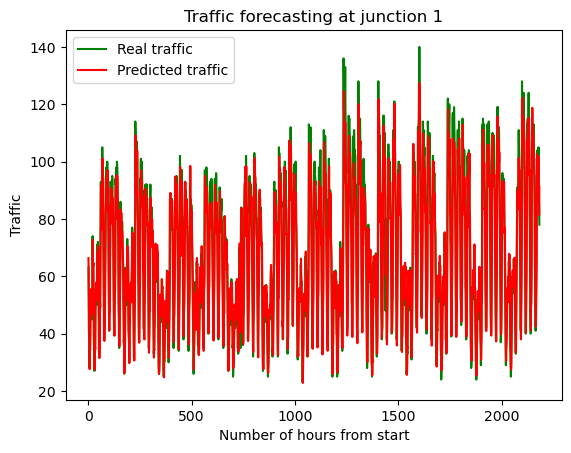

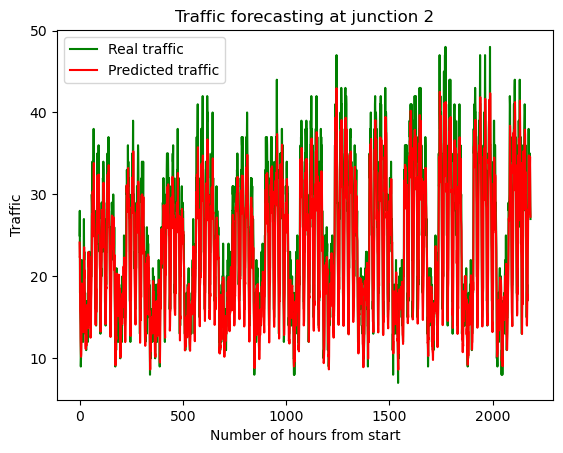

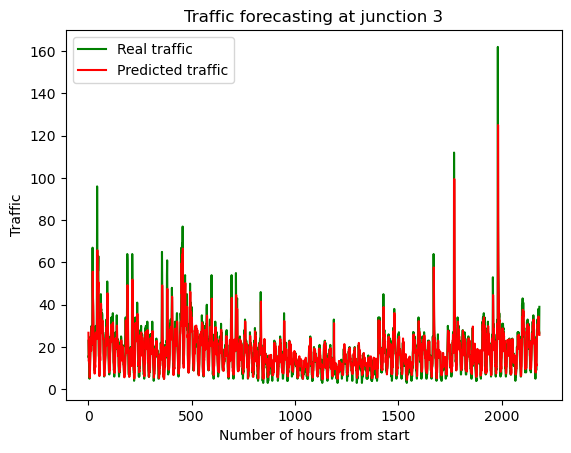

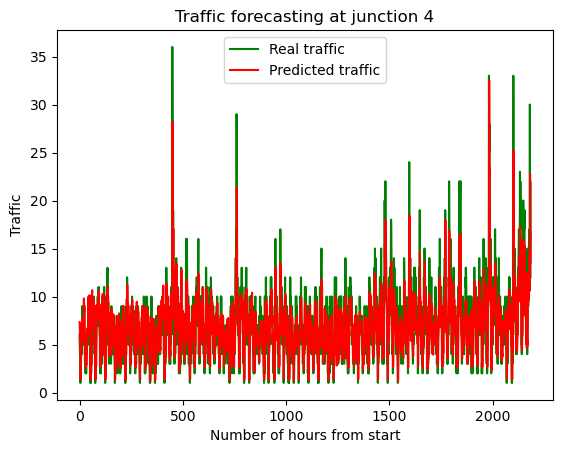

In [108]:
#Visualizing result for the junctions
for junction in range(4):
    plt.figure
    plt.plot(y_truth.values[:,junction],color='green' , label='Real traffic')
    plt.plot(y_pred[:,junction],color='red',label='Predicted traffic')
    plt.title('Traffic forecasting at junction %i' % (junction+1))
    plt.xlabel('Number of hours from start')
    plt.ylabel('Traffic')
    plt.legend()
    plt.show()

In [109]:
from sklearn.metrics import mean_squared_error
from math import sqrt
def rmse(y_true,y_pred):
    return sqrt(mean_squared_error(y_true,y_pred))

In [110]:
rmse(y_truth,y_pred)

5.855283385344727

In [111]:
import pandas as pd 
import numpy as np
trdf=pd.read_csv('train_ML_IOT.csv')
trainMat=trdf.to_numpy()
tedf=pd.read_csv('test_ML_IOT.csv')
testMat=tedf.to_numpy()
train=[]
target=[]
print(trainMat)
for i in trainMat:
    s=i[3]
    year=s/(10**7)
    s=s%(10**7)
    month=s/(10**5)
    s=s%(10**5)
    date=s/(10**3)
    s=s%(10**3)
    time=s%(10)
    s=s%(10)
    junction=s
    train.append([year,month,date,time,junction])
    target.append(i[2])
    X=np.array(train)
    y=np.array(target)

[['2015-11-01 00:00:00' 1 15 20151101001]
 ['2015-11-01 01:00:00' 1 13 20151101011]
 ['2015-11-01 02:00:00' 1 10 20151101021]
 ...
 ['2017-06-30 21:00:00' 4 16 20170630214]
 ['2017-06-30 22:00:00' 4 22 20170630224]
 ['2017-06-30 23:00:00' 4 12 20170630234]]


In [118]:
jun1=[]
jun2=[]
jun3=[]
jun4=[]
jun5=[]
jun=[jun1,jun2,jun3,jun4,jun5]
for i in range(0,len(train),24):
    ct=0
    for j in range (24):
        ct+=target[i+j]
        #print train[i][4]
    jun[train[i][4]-1].append(ct)
jun[3]=[0]*(len(jun[0])-len(jun[3]))+jun[3]
print(len(jun[0]),len(jun[1]),len(jun[2]),len(jun[3]))
        
k=7
week=[[] for i in range (k)]
for i in range (len(jun[1])):
    week=[i%k].append(jun[1][i])
for i in range (k):
    print (np.mean(week[i]))

hour=[[] for i in range (24)]

for i in range (len(jun[0])*24+len(jun[1])*24,len(jun[0])*24+len(jun[1])*24+len(jun[2])*24):
    hour[i%24].append(target[i])
for i in range (24):
    print(np.mean(hour[i]))
temp=[-i for i in jun[3]]
jun[4]=np.add(jun[2],temp)
    

608 608 608 608


TypeError: 'NoneType' object is not subscriptable

In [119]:
import matplotlib.pyplot as plt 
for i in range (len(week)):
    plt.plot(week[i] , 'blue')
    plt.savefig ('f' + str(i) + '.png')
    plt.show()

TypeError: object of type 'NoneType' has no len()

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
#plt.plot(jun[0], 'red')
plt.plot(jun[2], 'blue')
#plt.plot(jun[2], 'green')
plt.plot(jun[3], 'yellow')
plt.show()
plt.plot(jun[0], 'red')
plt.show()
plt.plot(jun[1], 'blue')
plt.show()
plt.plot(jun[2], 'green')
plt.show()
plt.plot(jun[3], 'yellow')
plt.show()
plt.plot(jun[4], 'red')
plt.show()

In [ ]:
#Random Forest Classifier

In [ ]:
from sklearn.model_selection import StratifiedKFold
skf=StratifiedKFold(n_splits=7)
from sklearn.ensemble import RandomForestClassifier
clf1=RandomForestClassifier(criterion='entropy' , min_samples_split=150 , min_samples_leaf=10, max_depth=12)
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
clf1.fit(X,y)
pred=clf1.predict(X)

In [ ]:
val1=(accuracy_score(y,pred)*100)
print ("*Accuracy score for RF : " , val1*5 , "\n")